In [271]:
import numpy as np
import pandas as pd
data = pd.read_sas('DR1IFF_I.xpt')
data.sort_values(by=['DR1_020'])
print(type(data['DR1_020']))

<class 'pandas.core.series.Series'>


In [178]:
X = data[['DR1_020']].copy()
Y = data[['DR1ICARB']].copy()

In [179]:
Y

,DR1ICARB
0,5.397605e-79
1,3.560000e+00
2,2.320000e+00
3,5.397605e-79
4,4.088000e+01
5,2.500000e-01
6,1.740000e+00
7,4.867000e+01
8,1.170000e+00
9,2.740000e+00


In [180]:
for row, value in X.iterrows():
    value['DR1_020'] = value['DR1_020']*24/86400

In [181]:
print(X)

          DR1_020
0        7.500000
1        7.500000
2        7.500000
3        8.000000
4        9.000000
5        9.000000
6       11.500000
7       12.500000
8       12.500000
9       12.500000
10      12.500000
11      18.000000
12      18.000000
13      18.000000
14      18.000000
15      20.000000
16      21.000000
17      10.500000
18      10.500000
19      13.000000
20      20.000000
21      20.000000
22      20.000000
23      20.000000
24      20.000000
25       9.000000
26       9.000000
27       9.000000
28       9.000000
29       9.000000
...           ...
121451   8.666667
121452   8.666667
121453   8.666667
121454   8.666667
121455  10.000000
121456  11.833333
121457  11.833333
121458  11.833333
121459  11.833333
121460  11.833333
121461  14.250000
121462  14.500000
121463  16.000000
121464  19.000000
121465  19.000000
121466  19.000000
121467  22.000000
121468   9.000000
121469   9.000000
121470  11.000000
121471  14.000000
121472  14.000000
121473  15.500000
121474  15

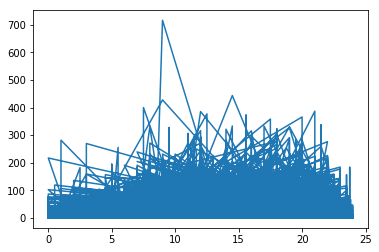

In [182]:
import matplotlib.pyplot as plt
plt.plot(X,Y)

Text(0, 0.5, 'CHO level')

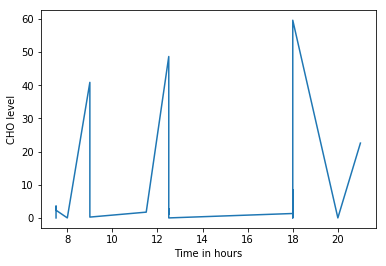

In [183]:
plt.plot(X[:17], Y[:17])
plt.xlabel("Time in hours")
plt.ylabel("CHO level")

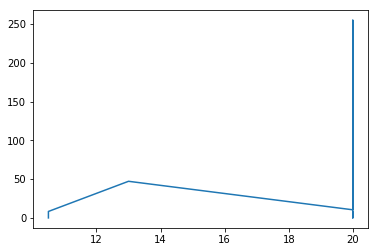

In [184]:
plt.plot(X[17:25], Y[17:25])

In [185]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X[:100],Y[:100])
lr.score(X[:100], Y[:100])

0.021088285413998542

### Relation of CHO with different features

In [186]:
data = data.dropna()
X = data[['SEQN', 'DR1_020']].copy()
Y = data[['DR1ICARB']].copy()

In [187]:
print(len(X))

110191


In [188]:
data = data.dropna()
uniqueSEQN = data.SEQN.unique()
X = data[['SEQN', 'DR1_020']].copy()
Y = data[['DR1ICARB']].copy()
data1 = data[['SEQN', 'DR1_020', 'DR1ICARB']].copy()

In [189]:
len(uniqueSEQN)

8258

In [70]:
all_CHO =[]
for seqn in uniqueSEQN:
    chosum = 0
    for row, value in data1.iterrows():
        if value['SEQN'] == seqn:
            chosum = chosum + value['DR1ICARB']
    print (chosum)
    all_CHO.append(chosum)

193.29000000000002
356.84999999999997
304.53000000000003
157.99
90.3
153.43
178.67
137.35
159.68
282.58
286.55
144.34
238.23
186.52
240.18
289.33
492.2
108.27000000000001
493.2
272.01
230.26000000000002
364.15000000000003
269.75
125.58000000000001
446.23
498.5500000000001
234.44
234.15
162.59
427.26
531.3100000000001
220.65999999999997
283.36
112.57000000000001
179.37
132.35999999999999
215.48
313.5799999999999
236.44000000000003
289.22
367.08
294.47
255.42999999999998
341.58000000000004
305.99
177.51999999999998
282.07000000000005
260.07
136.27
1177.4900000000002
75.77000000000001
228.23
233.77
92.48999999999998
175.93
101.94
80.13
371.74
359.15999999999997
170.54999999999998
101.36
298.15000000000003
62.86999999999999
253.92999999999998
184.96999999999997
175.14999999999998
301.16
210.45000000000002
300.17999999999995
22.240000000000002
143.42000000000002
103.75
194.91
321.72
112.44999999999999
251.86999999999995
159.09999999999997
122.81
257.97999999999996
256.01
395.22999999999996


228.01000000000002
209.13
125.31
186.72
68.25
311.43000000000006
509.2699999999999
336.76000000000005
380.9500000000001
318.55999999999995
479.36999999999995
53.83
119.85
177.03
307.23999999999995
164.02
383.05
455.56999999999994
179.52
211.72000000000003
260.04
138.19
277.17
264.81
87.06
117.61999999999999
150.06
204.26000000000002
406.37
361.96000000000004
192.46000000000006
185.42000000000002
144.57999999999998
151.92000000000002
217.7
71.89
380.62
173.30999999999997
292.09000000000003
201.53000000000003
164.25000000000003
226.1
161.35
144.64
205.05
274.26
254.99000000000004
369.17
307.88
205.89
231.3
90.88
175.45000000000002
259.22
278.48999999999995
157.15
263.33000000000004
312.64
244.89
127.85
74.05
228.88
132.49
196.97000000000003
146.67000000000002
79.34
295.37
338.28999999999996
349.44
162.57000000000002
308.48
656.6700000000001
372.97
294.62
169.45
34.76
664.4100000000001
102.78999999999999
135.14
87.8
246.22999999999996
136.52
342.93
149.78
399.40000000000003
179.43
161.339

129.09
313.11
180.06
147.16
319.49
274.73
254.04999999999998
85.52000000000001
446.00999999999993
255.95999999999998
212.28
80.73
205.26
83.22
311.22999999999996
266.85
249.04000000000002
183.20999999999998
33.150000000000006
335.84000000000003
311.05
131.38999999999996
220.28000000000003
205.49000000000004
223.12000000000003
285.52
105.59000000000002
212.54999999999998
180.72000000000003
53.04
89.08999999999999
147.07
188.14000000000001
282.51
278.19
111.14999999999999
227.79000000000002
141.32999999999998
177.41
143.81
404.40999999999997
234.54999999999998
325.58000000000004
187.58999999999997
168.94
252.98999999999998
241.31
186.29
223.02
332.94999999999993
286.29
72.93999999999998
193.36999999999998
177.89999999999998
117.98
396.84999999999997
311.09
196.49
158.32
200.03
278.59000000000003
177.7
150.66
153.76000000000005
180.08000000000004
180.40999999999997
288.49999999999994
261.76
273.3
237.47000000000003
299.1
126.30999999999999
158.99
256.38
348.62
254.49
141.26
534.47
293.85


154.89
348.5
298.71999999999997
170.91
587.09
403.78
208.48999999999998
229.56000000000003
214.41000000000003
465.43
230.13000000000002
124.38000000000001
218.54999999999995
290.5
221.14
211.33
292.57
176.8
245.27
321.43
364.43
127.01
218.79999999999998
294.26000000000005
359.59
372.08
409.92999999999995
312.84000000000003
192.29999999999998
263.85
167.49
88.6
222.29999999999998
374.8299999999999
301.08000000000004
114.91999999999996
281.18
223.88
177.95
85.48
165.67
143.49
103.94999999999999
254.24
276.35999999999996
185.45000000000002
250.53
455.61000000000007
300.13
237.85999999999996
164.26
225.11
301.56
106.5
438.92999999999995
278.24
208.32999999999998
197.05999999999997
115.57
262.56
320.9
243.11999999999998
196.42000000000002
460.8399999999999
222.53
341.62
206.44
289.33000000000004
136.14
195.82000000000002
186.10000000000002
206.3
272.34000000000003
140.33999999999997
142.95
201.75999999999996
130.07
365.47
636.1300000000001
85.07
147.69
216.0
176.12
249.78000000000003
388.94

100.33
375.2
281.0
124.94999999999999
239.26
42.36
152.57
87.1
170.29000000000002
216.00000000000006
500.81
181.45
168.23
78.19
199.30999999999997
85.75
205.53000000000003
125.82000000000001
502.5300000000001
191.48000000000002
107.69
192.56999999999996
92.63
263.88
290.66
279.2899999999999
52.9
348.58
185.96
302.75000000000006
257.09
151.77
251.74000000000004
182.45999999999998
128.26
416.69
152.36
237.48000000000002
305.30000000000007
114.97
107.64
280.8
189.74
352.66
209.04000000000002
217.92999999999998
276.69000000000005
155.56000000000003
506.5300000000001
276.28999999999996
126.67999999999999
129.46
353.32000000000005
261.03
180.03999999999996
511.25
139.01
181.06999999999996
261.77
67.86
226.09
109.31
156.85999999999999
356.45000000000005
223.65
108.11
340.02
71.12
195.85
298.77
184.92000000000002
188.29000000000002
245.23000000000002
173.31
79.74000000000001
241.73999999999998
381.46
214.43
112.78
212.33
264.39
336.11
122.64999999999999
245.79000000000002
233.29
152.62
182.15


158.1
226.91000000000005
219.13
353.01
342.6
400.28000000000003
323.69
354.04
249.27000000000007
280.01
179.62
254.29000000000002
266.02
216.91000000000003
279.28
182.01000000000002
282.58
369.5400000000001
198.55999999999995
312.31000000000006
135.08
87.1
163.73999999999998
434.39000000000004
402.34
257.55
396.76
278.90999999999997
112.11999999999999
160.23
97.57000000000001
79.69999999999999
127.03
250.40999999999997
203.51
249.16
142.15
361.1
183.78
152.25
157.82000000000002
185.08
179.58
73.32
371.86
309.02000000000004
167.23999999999998
288.19
180.54
307.83
211.93
155.35
277.0
196.35
391.59
223.06999999999996
145.2
44.8
270.27
234.47
287.84000000000003
142.51
238.23
84.17999999999999
156.23000000000002
299.42999999999995
128.81
87.08
405.3
353.87999999999994
289.43000000000006
271.14
447.96999999999997
326.2
154.65
215.31
121.21
166.81
214.60999999999999
141.9
89.26
287.04
231.89000000000001
214.84
312.72
230.97000000000003
204.43
183.23
189.75000000000003
145.19
452.8599999999999

199.32999999999998
146.95999999999998
285.63000000000005
191.42
206.38000000000002
491.29999999999995
163.14999999999998
288.65999999999997
235.55
303.37
300.92
355.6
156.8
446.28999999999996
143.32
113.46000000000001
206.16
95.53999999999998
195.2
72.0
66.28
107.01000000000002
116.15
136.40000000000003
384.89
312.51
132.09
275.74
323.64
99.28999999999999
388.44
235.20000000000002
213.17
274.94000000000005
136.72
96.99999999999997
342.49999999999994
185.76
174.25
150.07000000000002
172.03000000000003
371.88
224.32999999999998
186.54
110.52000000000001
312.90000000000003
211.45999999999998
229.3
173.1
228.07999999999998
167.20000000000005
122.04999999999998
118.52000000000001
145.62
205.15000000000003
232.47999999999996
243.94000000000003
292.0399999999999
196.86999999999998
251.98
223.39
365.28000000000003
127.98
238.29000000000002
325.7200000000001
233.35
499.54999999999995
407.81
698.7499999999999
172.08
98.39999999999999
262.42
136.41
238.42999999999998
118.19000000000003
208.91
293

240.42
144.09
160.65
162.87
328.03
270.2
470.24999999999994
55.16
62.879999999999995
167.43
214.62
244.28000000000003
291.60999999999996
185.48999999999998
298.22
166.60000000000002
336.19
314.48999999999995
236.85999999999993
360.29999999999995
262.07
230.53000000000006
248.85999999999999
204.54999999999998
71.16
252.46
113.24000000000001
521.9799999999998
89.46999999999998
311.52000000000004
181.93
4.54
148.56
347.93999999999994
92.66
210.79999999999998
326.37
167.34
261.9
289.81
137.60000000000002
184.15999999999997
141.46
83.05000000000001
287.67
331.56
149.1
261.18
429.33000000000004
212.76
352.62
524.96
255.56
238.61999999999998
156.46
134.9
127.74
360.40999999999997
144.6
277.46
203.15000000000003
286.50000000000006
133.36
350.64
310.41999999999996
197.12
136.88
170.7
489.9
66.11
252.32000000000002
393.25
142.44
310.68000000000006
179.67000000000002
221.26999999999998
100.09
328.67999999999995
289.03
151.92
184.08
267.96
533.3900000000001
163.62
317.52000000000004
240.24
175.63


302.91999999999996
273.26
212.26999999999998
205.34
225.75
543.04
207.53
91.16000000000003
211.35
127.98
218.66000000000003
262.21999999999997
207.63
169.92000000000002
269.61
437.38
268.59000000000003
304.75
244.37999999999997
385.01
208.24999999999997
433.11
96.78999999999999
113.03
204.54
175.72
262.33000000000004
193.61
103.95999999999998
314.54999999999995
315.29
184.0
345.85
528.21
48.76
219.09
92.41
153.24999999999997
204.93
322.18999999999994
212.67000000000002
110.29
182.72
201.76999999999998
211.97999999999993
445.8199999999999
127.46000000000001
132.94
252.25999999999996
106.13
434.62999999999994
148.14
147.59
248.86
158.66
338.15
216.77999999999997
174.02999999999997
189.33999999999995
143.5
85.33000000000001
97.58999999999999
230.66000000000003
185.45999999999998
486.47999999999996
460.04
169.19
192.55
242.27999999999997
157.51
165.41
265.88
574.68
187.28
112.55999999999999
209.03
430.64000000000004
170.52999999999997
321.98
174.93
310.91999999999996
147.97
229.05
269.6599

429.46
337.41
335.3500000000001
195.18999999999994
243.09
201.45000000000002
104.37
193.54
454.45
1016.3399999999998
357.26000000000005
245.04
263.3
278.08
174.37
53.97
166.72000000000003
358.36
175.57999999999998
825.4599999999997
229.98000000000002
255.25
150.86999999999998
214.32999999999998
183.16999999999996
81.93
200.50000000000003
350.18
326.37
150.92
220.07999999999998
249.59
78.81
175.46999999999997
187.02
220.32
197.99999999999997
289.12
5.32
291.79
289.44999999999993
307.16
59.510000000000005
141.79
161.29000000000002
151.82
123.92
252.10000000000002
200.61
130.09
294.11999999999995
199.49
319.49000000000007
185.85
317.37999999999994
137.5
135.73
350.32
125.50999999999999
235.31000000000003
205.38
140.45
117.15
283.04
323.25000000000006
164.25
165.63000000000002
230.85
195.92000000000002
45.419999999999995
256.06
287.46999999999997
192.04000000000002
175.97
446.61
228.64000000000001
231.45
199.36
453.60999999999996
244.88000000000002
139.76
314.02
427.7600000000001
212.17
41

204.6
142.8
318.49
305.53999999999996
229.39000000000001
113.00999999999999
194.04000000000002
480.78999999999996
161.61
123.43
332.77
75.35
116.45
61.49
417.85
369.96
235.60000000000002
143.61
53.3
335.25
417.71
152.92999999999998
192.13000000000002
170.13
265.99
158.62
169.0
507.61
187.66
93.47
236.44
333.71000000000004
166.88
320.11
231.79
181.10999999999999
231.01000000000002
109.16000000000003
642.6500000000001
286.18
129.10999999999999
316.57
220.97
191.73000000000002
30.04
277.7
273.18
163.72
218.39000000000004
72.23
264.19
52.42
269.31000000000006
368.78000000000003
79.57
266.19
169.67
284.43000000000006
344.73999999999995
332.7799999999999
356.17
477.34
269.11
75.4
387.49
101.8
400.92
286.29
219.14999999999995
183.18
242.72
98.58000000000001
148.14
288.18
335.93000000000006
48.309999999999995
167.01999999999995
278.34000000000003
294.31
146.53
112.14
97.41000000000001
193.71999999999997
302.56
96.89
150.89
575.7
58.529999999999994
263.28
179.32
173.93
311.06
147.92000000000004

116.71999999999998
424.57000000000005
223.62999999999997
156.85000000000002
217.82
13.64
260.0
275.92999999999995
383.48
179.00999999999996
132.16000000000003
227.06999999999996
319.14
424.56
219.92
116.87
134.21
405.77999999999986
498.69
490.5100000000001
126.16
336.59000000000003
349.73999999999995
89.43
325.51
158.17000000000002
157.34
120.9
100.13
207.49999999999997
177.42999999999998
352.92999999999995
273.28999999999996
207.62
433.2
369.85999999999996
436.16999999999996
66.88
123.72
465.65999999999997
305.28
463.16000000000014
366.0
145.71
188.87
140.41
79.50999999999999
330.59999999999997
297.58
615.5199999999999
180.45000000000002
253.60999999999996
202.51
261.36
194.03999999999996
158.99000000000007
492.0900000000001
94.46999999999998
159.54999999999998
235.17000000000002
459.96999999999997
243.00000000000006
145.59
275.23
273.84999999999997
591.4399999999999
113.27
433.53000000000003
199.01
577.0199999999999
323.07
309.17
328.11
226.8
187.59
495.91
206.45
128.62
209.41
194.86

79.89999999999999
183.43
150.3
237.96000000000004
123.18
168.47
336.85999999999996
339.75
157.37000000000003
138.76
342.62
139.04
253.75
198.45000000000002
98.94
324.72
339.12
278.82
540.06
231.38000000000002
341.44
232.96999999999997
322.7299999999999
332.75
91.25
156.31
287.45
232.37
181.35
128.45
252.77
198.79000000000002
432.9599999999999
97.91999999999999
287.67
220.71
346.03999999999996
183.76999999999998
417.11
275.7
124.57
405.16999999999996
126.38999999999999
125.21000000000001
328.32000000000005
129.93
164.88000000000002
315.57
104.77
236.36
207.71
101.27
218.7
132.07999999999998
304.0
437.62000000000006
144.54
165.93
177.87000000000003
153.57
122.27000000000001
276.22999999999996
141.76999999999998
295.22
208.48000000000002
185.77
131.55
285.26
281.9599999999999
451.39
270.04
112.4
233.64000000000001
298.88
122.44000000000001
297.1600000000001
186.49
217.05999999999997
257.12
247.36000000000004
194.96
289.03999999999996
289.76
213.27000000000004
281.40000000000003
263.49
189

In [72]:
all_CHO

[193.29000000000002,
 356.84999999999997,
 304.53000000000003,
 157.99,
 90.3,
 153.43,
 178.67,
 137.35,
 159.68,
 282.58,
 286.55,
 144.34,
 238.23,
 186.52,
 240.18,
 289.33,
 492.2,
 108.27000000000001,
 493.2,
 272.01,
 230.26000000000002,
 364.15000000000003,
 269.75,
 125.58000000000001,
 446.23,
 498.5500000000001,
 234.44,
 234.15,
 162.59,
 427.26,
 531.3100000000001,
 220.65999999999997,
 283.36,
 112.57000000000001,
 179.37,
 132.35999999999999,
 215.48,
 313.5799999999999,
 236.44000000000003,
 289.22,
 367.08,
 294.47,
 255.42999999999998,
 341.58000000000004,
 305.99,
 177.51999999999998,
 282.07000000000005,
 260.07,
 136.27,
 1177.4900000000002,
 75.77000000000001,
 228.23,
 233.77,
 92.48999999999998,
 175.93,
 101.94,
 80.13,
 371.74,
 359.15999999999997,
 170.54999999999998,
 101.36,
 298.15000000000003,
 62.86999999999999,
 253.92999999999998,
 184.96999999999997,
 175.14999999999998,
 301.16,
 210.45000000000002,
 300.17999999999995,
 22.240000000000002,
 143.4200

In [73]:
len(all_CHO)

8258

all_CHO has total CHO levels of each 8258 participants

In [190]:
data1

,SEQN,DR1_020,DR1ICARB
0,83732.0,27000.0,5.397605e-79
1,83732.0,27000.0,3.560000e+00
2,83732.0,27000.0,2.320000e+00
3,83732.0,28800.0,5.397605e-79
4,83732.0,32400.0,4.088000e+01
5,83732.0,32400.0,2.500000e-01
6,83732.0,41400.0,1.740000e+00
7,83732.0,45000.0,4.867000e+01
8,83732.0,45000.0,1.170000e+00
9,83732.0,45000.0,2.740000e+00


In [76]:
help(data1.rolling)

Help on method rolling in module pandas.core.generic:

rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None) method of pandas.core.frame.DataFrame instance
    Provides rolling window calculations.
    
    .. versionadded:: 0.18.0
    
    Parameters
    ----------
    window : int, or offset
        Size of the moving window. This is the number of observations used for
        calculating the statistic. Each window will be a fixed size.
    
        If its an offset then this will be the time period of each window. Each
        window will be a variable sized based on the observations included in
        the time-period. This is only valid for datetimelike indexes. This is
        new in 0.19.0
    min_periods : int, default None
        Minimum number of observations in window required to have a value
        (otherwise result is NA). For a window that is specified by an offset,
        this will default to 1.
    center : boolean, default Fals

In [83]:
k = data1.rolling(10)

In [84]:
print(k)

Rolling [window=10,center=False,axis=0]


In [85]:
data1

,SEQN,DR1_020,DR1ICARB
0,83732.0,27000.0,5.397605e-79
1,83732.0,27000.0,3.560000e+00
2,83732.0,27000.0,2.320000e+00
3,83732.0,28800.0,5.397605e-79
4,83732.0,32400.0,4.088000e+01
5,83732.0,32400.0,2.500000e-01
6,83732.0,41400.0,1.740000e+00
7,83732.0,45000.0,4.867000e+01
8,83732.0,45000.0,1.170000e+00
9,83732.0,45000.0,2.740000e+00


In [86]:
data1 = data[['SEQN', 'DR1_020', 'DR1ICARB']].copy()

In [87]:
data1

,SEQN,DR1_020,DR1ICARB
0,83732.0,27000.0,5.397605e-79
1,83732.0,27000.0,3.560000e+00
2,83732.0,27000.0,2.320000e+00
3,83732.0,28800.0,5.397605e-79
4,83732.0,32400.0,4.088000e+01
5,83732.0,32400.0,2.500000e-01
6,83732.0,41400.0,1.740000e+00
7,83732.0,45000.0,4.867000e+01
8,83732.0,45000.0,1.170000e+00
9,83732.0,45000.0,2.740000e+00


In [96]:
data1.rolling(window=100).mean()

,SEQN,DR1_020,DR1ICARB
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [97]:
data1 = data[['SEQN', 'DR1_020', 'DR1ICARB']].copy()

In [98]:
data1

,SEQN,DR1_020,DR1ICARB
0,83732.0,27000.0,5.397605e-79
1,83732.0,27000.0,3.560000e+00
2,83732.0,27000.0,2.320000e+00
3,83732.0,28800.0,5.397605e-79
4,83732.0,32400.0,4.088000e+01
5,83732.0,32400.0,2.500000e-01
6,83732.0,41400.0,1.740000e+00
7,83732.0,45000.0,4.867000e+01
8,83732.0,45000.0,1.170000e+00
9,83732.0,45000.0,2.740000e+00


In [102]:
help(data1.rolling(window=3))

Help on Rolling in module pandas.core.window object:

class Rolling(_Rolling_and_Expanding)
 |  Rolling(obj, window=None, min_periods=None, center=False, win_type=None, axis=0, on=None, closed=None, **kwargs)
 |  
 |  baseclass for various pandas objects
 |  
 |  Method resolution order:
 |      Rolling
 |      _Rolling_and_Expanding
 |      _Rolling
 |      _Window
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      pandas.core.base.SelectionMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  agg = aggregate(self, arg, *args, **kwargs)
 |  
 |  aggregate(self, arg, *args, **kwargs)
 |      Aggregate using one or more operations over the specified axis.
 |      
 |      
 |      
 |      Parameters
 |      ----------
 |      func : function, string, dictionary, or list of string/functions
 |          Function to use for aggregating the data. If a function, must either
 |          work when passe

In [108]:
data1.rolling(50)

Rolling [window=50,center=False,axis=0]

In [109]:
data1

,SEQN,DR1_020,DR1ICARB
0,83732.0,27000.0,5.397605e-79
1,83732.0,27000.0,3.560000e+00
2,83732.0,27000.0,2.320000e+00
3,83732.0,28800.0,5.397605e-79
4,83732.0,32400.0,4.088000e+01
5,83732.0,32400.0,2.500000e-01
6,83732.0,41400.0,1.740000e+00
7,83732.0,45000.0,4.867000e+01
8,83732.0,45000.0,1.170000e+00
9,83732.0,45000.0,2.740000e+00


In [133]:
data1 = data[['SEQN', 'DR1ICARB', 'DR1_020']].copy()

In [134]:
data1

,SEQN,DR1ICARB,DR1_020
0,83732.0,5.397605e-79,27000.0
1,83732.0,3.560000e+00,27000.0
2,83732.0,2.320000e+00,27000.0
3,83732.0,5.397605e-79,28800.0
4,83732.0,4.088000e+01,32400.0
5,83732.0,2.500000e-01,32400.0
6,83732.0,1.740000e+00,41400.0
7,83732.0,4.867000e+01,45000.0
8,83732.0,1.170000e+00,45000.0
9,83732.0,2.740000e+00,45000.0


In [135]:
data1['pandas_SMA_3'] = data1.iloc[:,1].rolling(window=10000).mean()

In [136]:
data1

,SEQN,DR1ICARB,DR1_020,pandas_SMA_3
0,83732.0,5.397605e-79,27000.0,NaN
1,83732.0,3.560000e+00,27000.0,NaN
2,83732.0,2.320000e+00,27000.0,NaN
3,83732.0,5.397605e-79,28800.0,NaN
4,83732.0,4.088000e+01,32400.0,NaN
5,83732.0,2.500000e-01,32400.0,NaN
6,83732.0,1.740000e+00,41400.0,NaN
7,83732.0,4.867000e+01,45000.0,NaN
8,83732.0,1.170000e+00,45000.0,NaN
9,83732.0,2.740000e+00,45000.0,NaN


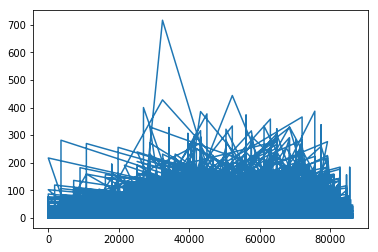

In [139]:
plt.plot(data1['DR1_020'], data1['DR1ICARB'])

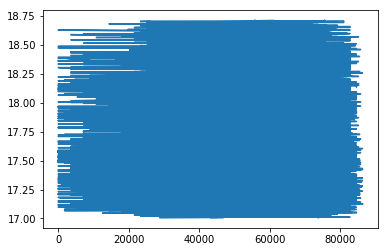

In [140]:
plt.plot(data1['DR1_020'], data1['pandas_SMA_3'])

In [164]:
data1 = data[['SEQN', 'DR1ICARB', 'DR1_020']].copy()

In [165]:
data1['CHO_MA'] = data1.iloc[:,1].rolling(window=50000).mean()

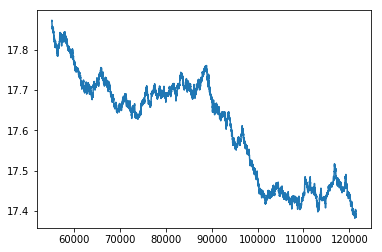

In [166]:
plt.plot(data1['CHO_MA'])

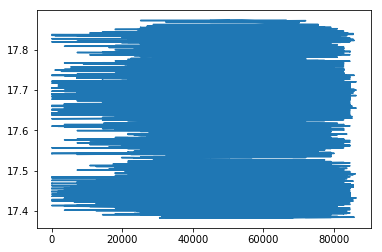

In [167]:
plt.plot(data1['DR1_020'] ,data1['CHO_MA'])

In [168]:
data1['CHO_MA1'] = data1.iloc[:,1].rolling(window=5000).mean()

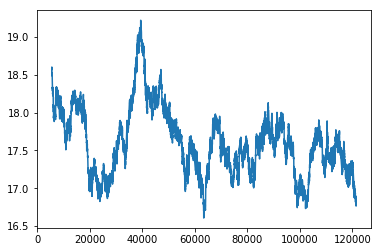

In [169]:
plt.plot(data1['CHO_MA1'])

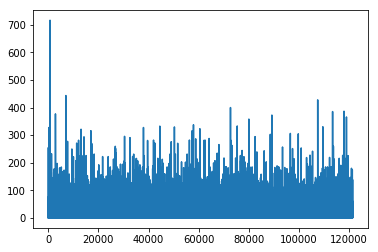

In [170]:
plt.plot(data1['DR1ICARB'])

In [171]:
data1['CHO_MA2'] = data1.iloc[:,1].rolling(window=100000).mean()

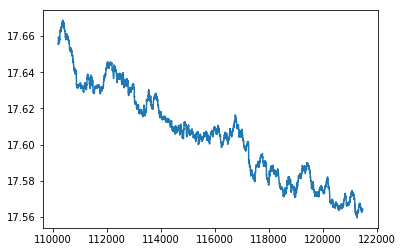

In [172]:
plt.plot(data1['CHO_MA2'])

In [173]:
data1

,SEQN,DR1ICARB,DR1_020,CHO_MA,CHO_MA1,CHO_MA2
0,83732.0,5.397605e-79,27000.0,NaN,NaN,NaN
1,83732.0,3.560000e+00,27000.0,NaN,NaN,NaN
2,83732.0,2.320000e+00,27000.0,NaN,NaN,NaN
3,83732.0,5.397605e-79,28800.0,NaN,NaN,NaN
4,83732.0,4.088000e+01,32400.0,NaN,NaN,NaN
5,83732.0,2.500000e-01,32400.0,NaN,NaN,NaN
6,83732.0,1.740000e+00,41400.0,NaN,NaN,NaN
7,83732.0,4.867000e+01,45000.0,NaN,NaN,NaN
8,83732.0,1.170000e+00,45000.0,NaN,NaN,NaN
9,83732.0,2.740000e+00,45000.0,NaN,NaN,NaN


In [174]:
data1['CHO_MA4'] = data1.iloc[:,1].rolling(window=80000).mean()

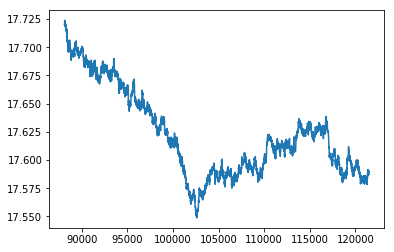

In [175]:
plt.plot(data1['CHO_MA4'])

In [192]:
for row, value in data1.iterrows():
    value['DR1_020'] = value['DR1_020']*24/86400

In [194]:
data1['CHO_MA'] = data1.iloc[:,1].rolling(window=80000).mean()

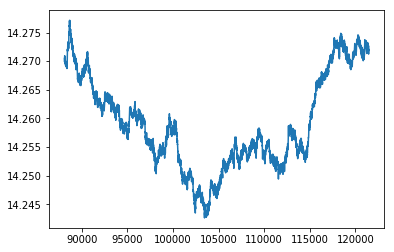

In [198]:
plt.plot(data1['CHO_MA'])

In [237]:
data = pd.read_sas('DR1IFF_I.xpt')
data = data.dropna()
data.sort_values(by=['DR1_020'])

,SEQN,WTDRD1,WTDR2D,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DR1IM181,DR1IM201,DR1IM221,DR1IP182,DR1IP183,DR1IP184,DR1IP204,DR1IP205,DR1IP225,DR1IP226
101014,92052.0,11215.900881,1.460231e+04,2.0,1.0,49.0,2.0,2.0,3.300000e+01,3.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
27400,85998.0,6059.940756,4.918980e+03,1.0,1.0,14.0,2.0,2.0,7.000000e+00,7.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
97331,91767.0,20923.257286,2.651885e+04,1.0,1.0,76.0,2.0,2.0,1.600000e+01,5.0,...,1.097000e+00,5.397605e-79,5.397605e-79,5.250000e-01,5.100000e-02,5.397605e-79,1.900000e-02,5.397605e-79,5.397605e-79,1.000000e-02
36718,86767.0,23380.006267,7.217810e+04,5.0,1.0,75.0,2.0,2.0,3.000000e+00,1.0,...,2.100000e-02,5.397605e-79,5.397605e-79,2.600000e-02,8.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
36717,86767.0,23380.006267,7.217810e+04,4.0,1.0,75.0,2.0,2.0,3.000000e+00,1.0,...,6.103000e+00,1.140000e-01,3.000000e-03,4.144000e+00,3.770000e-01,5.397605e-79,4.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79
36716,86767.0,23380.006267,7.217810e+04,3.0,1.0,75.0,2.0,2.0,3.000000e+00,1.0,...,3.442000e+00,7.100000e-02,1.000000e-03,1.278000e+00,5.500000e-02,5.397605e-79,4.000000e-02,1.000000e-03,6.000000e-03,2.000000e-03
36715,86767.0,23380.006267,7.217810e+04,2.0,1.0,75.0,2.0,2.0,3.000000e+00,1.0,...,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
36714,86767.0,23380.006267,7.217810e+04,1.0,1.0,75.0,2.0,2.0,3.000000e+00,1.0,...,5.432000e+00,2.700000e-02,5.397605e-79,2.559000e+00,1.260000e-01,5.397605e-79,1.870000e-01,5.397605e-79,6.000000e-03,5.800000e-02
42527,87249.0,11152.310987,1.010016e+04,1.0,1.0,14.0,2.0,2.0,2.000000e+00,7.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
92772,91393.0,65654.848989,7.224344e+04,1.0,1.0,22.0,2.0,2.0,1.100000e+01,3.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79


In [238]:
datanew = data[['SEQN', 'DR1_020', 'DR1ICARB']].copy()
datanew = datanew.sort_values(by=['DR1_020'])
y = datanew[['SEQN', 'DR1ICARB']].copy()
x = datanew[['SEQN', 'DR1_020']].copy()

,SEQN,DR1ICARB,CHO_MA
101014,92052.0,1.040000e+00,NaN
27400,85998.0,5.397605e-79,NaN
97331,91767.0,6.640000e+00,NaN
36718,86767.0,1.327000e+01,NaN
36717,86767.0,2.310000e+01,NaN
36716,86767.0,4.100000e-01,NaN
36715,86767.0,1.700000e-01,NaN
36714,86767.0,7.600000e-01,NaN
42527,87249.0,5.397605e-79,NaN
92772,91393.0,7.830000e+00,NaN


In [240]:
y['CHO_MA'] = y.iloc[:,1].rolling(window=80000).mean()

Text(0, 0.5, 'CHO level')

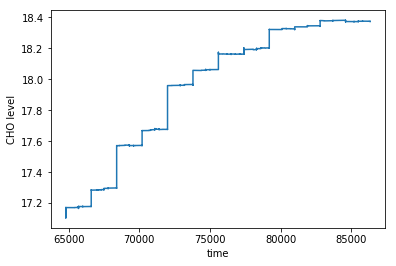

In [247]:
plt.plot(x['DR1_020'], y['CHO_MA'])
plt.xlabel("time")
plt.ylabel("CHO level")

In [272]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0)